In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as stats
%matplotlib inline
import pylab, os, pydotplus, warnings, statsmodels.api as sm
import statsmodels.formula.api as smf, statsmodels.stats.api as sms, statsmodels.tsa.api as smt
from scipy import stats
from math import sqrt
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_1samp
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from mlxtend.feature_selection import sequential_feature_selector, SequentialFeatureSelector as sfs
from mlxtend.evaluate import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from vecstack import stacking
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
import numpy as np
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import svm #support vector Machine
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
%matplotlib inline
color = sns.color_palette()
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from scipy.cluster.hierarchy import dendrogram,linkage
import itertools
#apply PCA
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
os.chdir(r'C:\Users\balaa\Desktop\python_update\supervised learning\final')

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Classify the quality

In [5]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Average")

In [6]:
#Create new column
category = pd.DataFrame(data=category, columns=["category"])
df = pd.concat([df,category],axis=1)

In [7]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Average
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Average
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Average


In [8]:
df.shape

(1599, 13)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis



Let's explore the data!



Here I counted the number of each class and checked correlation of the columns

Average    1319
Good        217
Bad          63
Name: category, dtype: int64

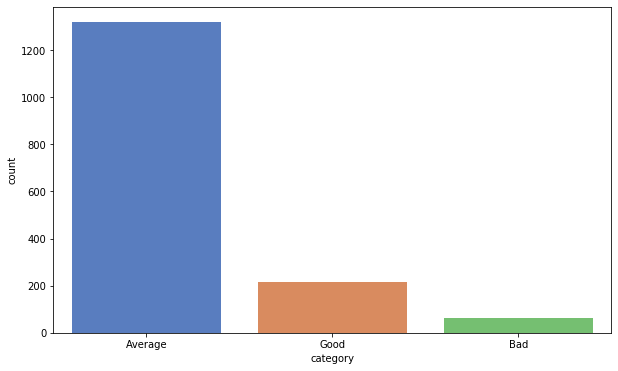

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(df["category"],palette="muted")
df["category"].value_counts()

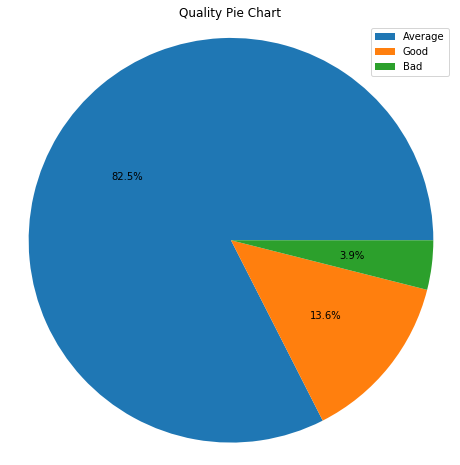

The good quality wines count for  13.6 %.


In [11]:
plt.figure(figsize = (8,8))
labels = df.category.value_counts().index
plt.pie(df.category.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(df.category.value_counts(normalize=True)[1]*100,1),'%.')

from this pie chart we can infer that there are more than 82% perecent data with average quality .this shows data imbalance in our dataset

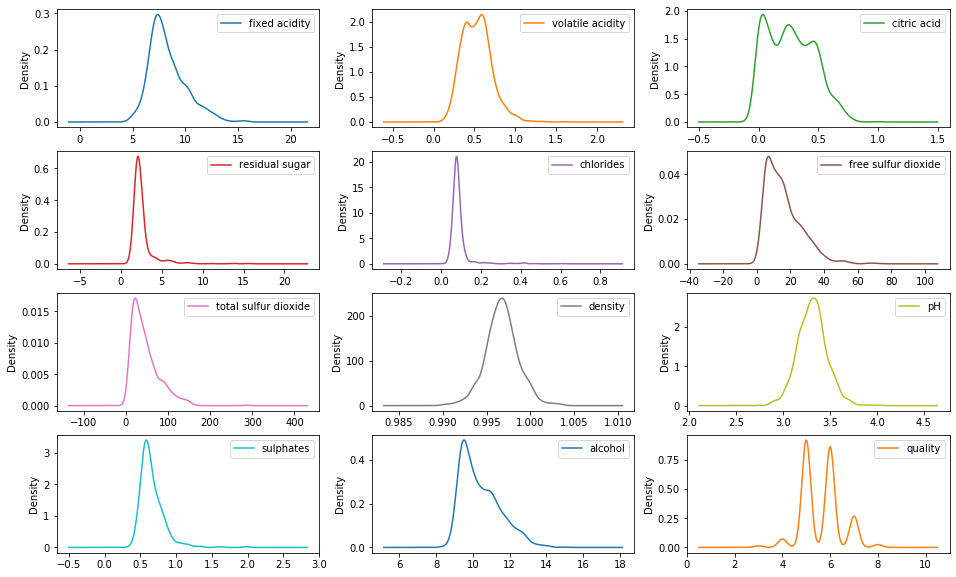

In [12]:
df.plot(kind='kde',subplots=True, layout=(4,3), sharex=False,figsize=(16, 10))
plt.show()

### pH and density is normally distributed and almost other columns are right skewed

# Heat Map

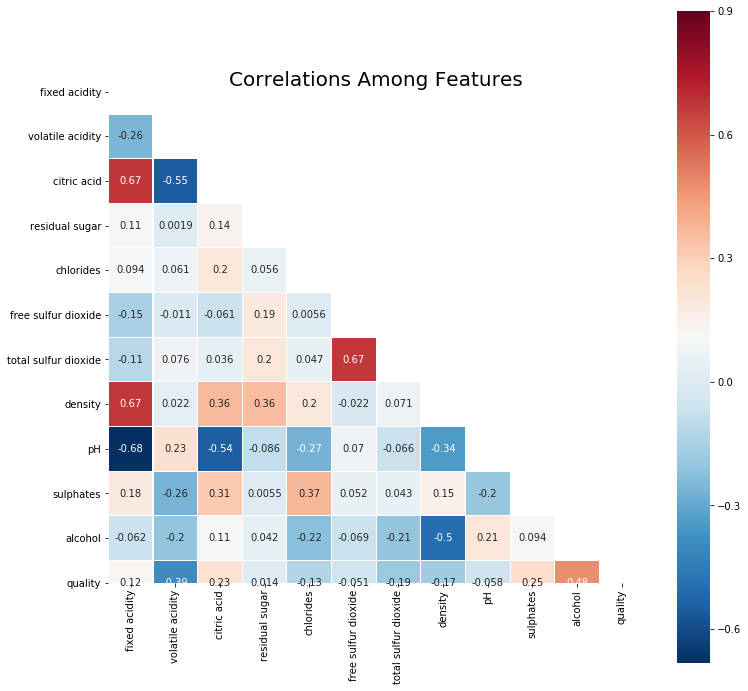

In [13]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(),
           annot=True,
           mask = mask,
           cmap = 'RdBu_r',
           linewidths=0.1,
           linecolor='white',
           vmax = .9,
           square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

# inference :
   ### fixed acidity - density -high correaltion
   ### fixed acidity - citric acid - high correlation 
   ### free sulfurdioxide - total sulfurdioxide  - high correlation 

Text(0.5, 1.0, 'SO2 vs TOTAL SO2')

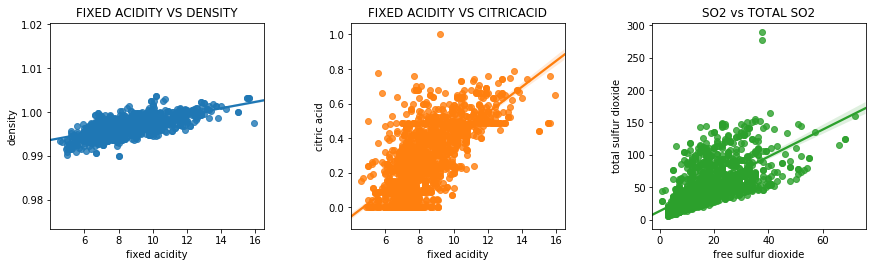

In [14]:



fig, axs = plt.subplots(1, 3, figsize = (20,10)) 
ax1 = plt.subplot2grid((5,15), (0,0), rowspan=2, colspan=3) 
ax2 = plt.subplot2grid((5,15), (0,4), rowspan=2, colspan=3)
ax3 = plt.subplot2grid((5,15), (0,8), rowspan=2, colspan=3)

sns.regplot(x='fixed acidity',y='density',data=df,ax=ax1)
sns.regplot(x='fixed acidity',y='citric acid',data=df,ax=ax2)
sns.regplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df,ax=ax3)

ax1.set_title('FIXED ACIDITY VS DENSITY')
ax2.set_title('FIXED ACIDITY VS CITRICACID')
ax3.set_title('SO2 vs TOTAL SO2')


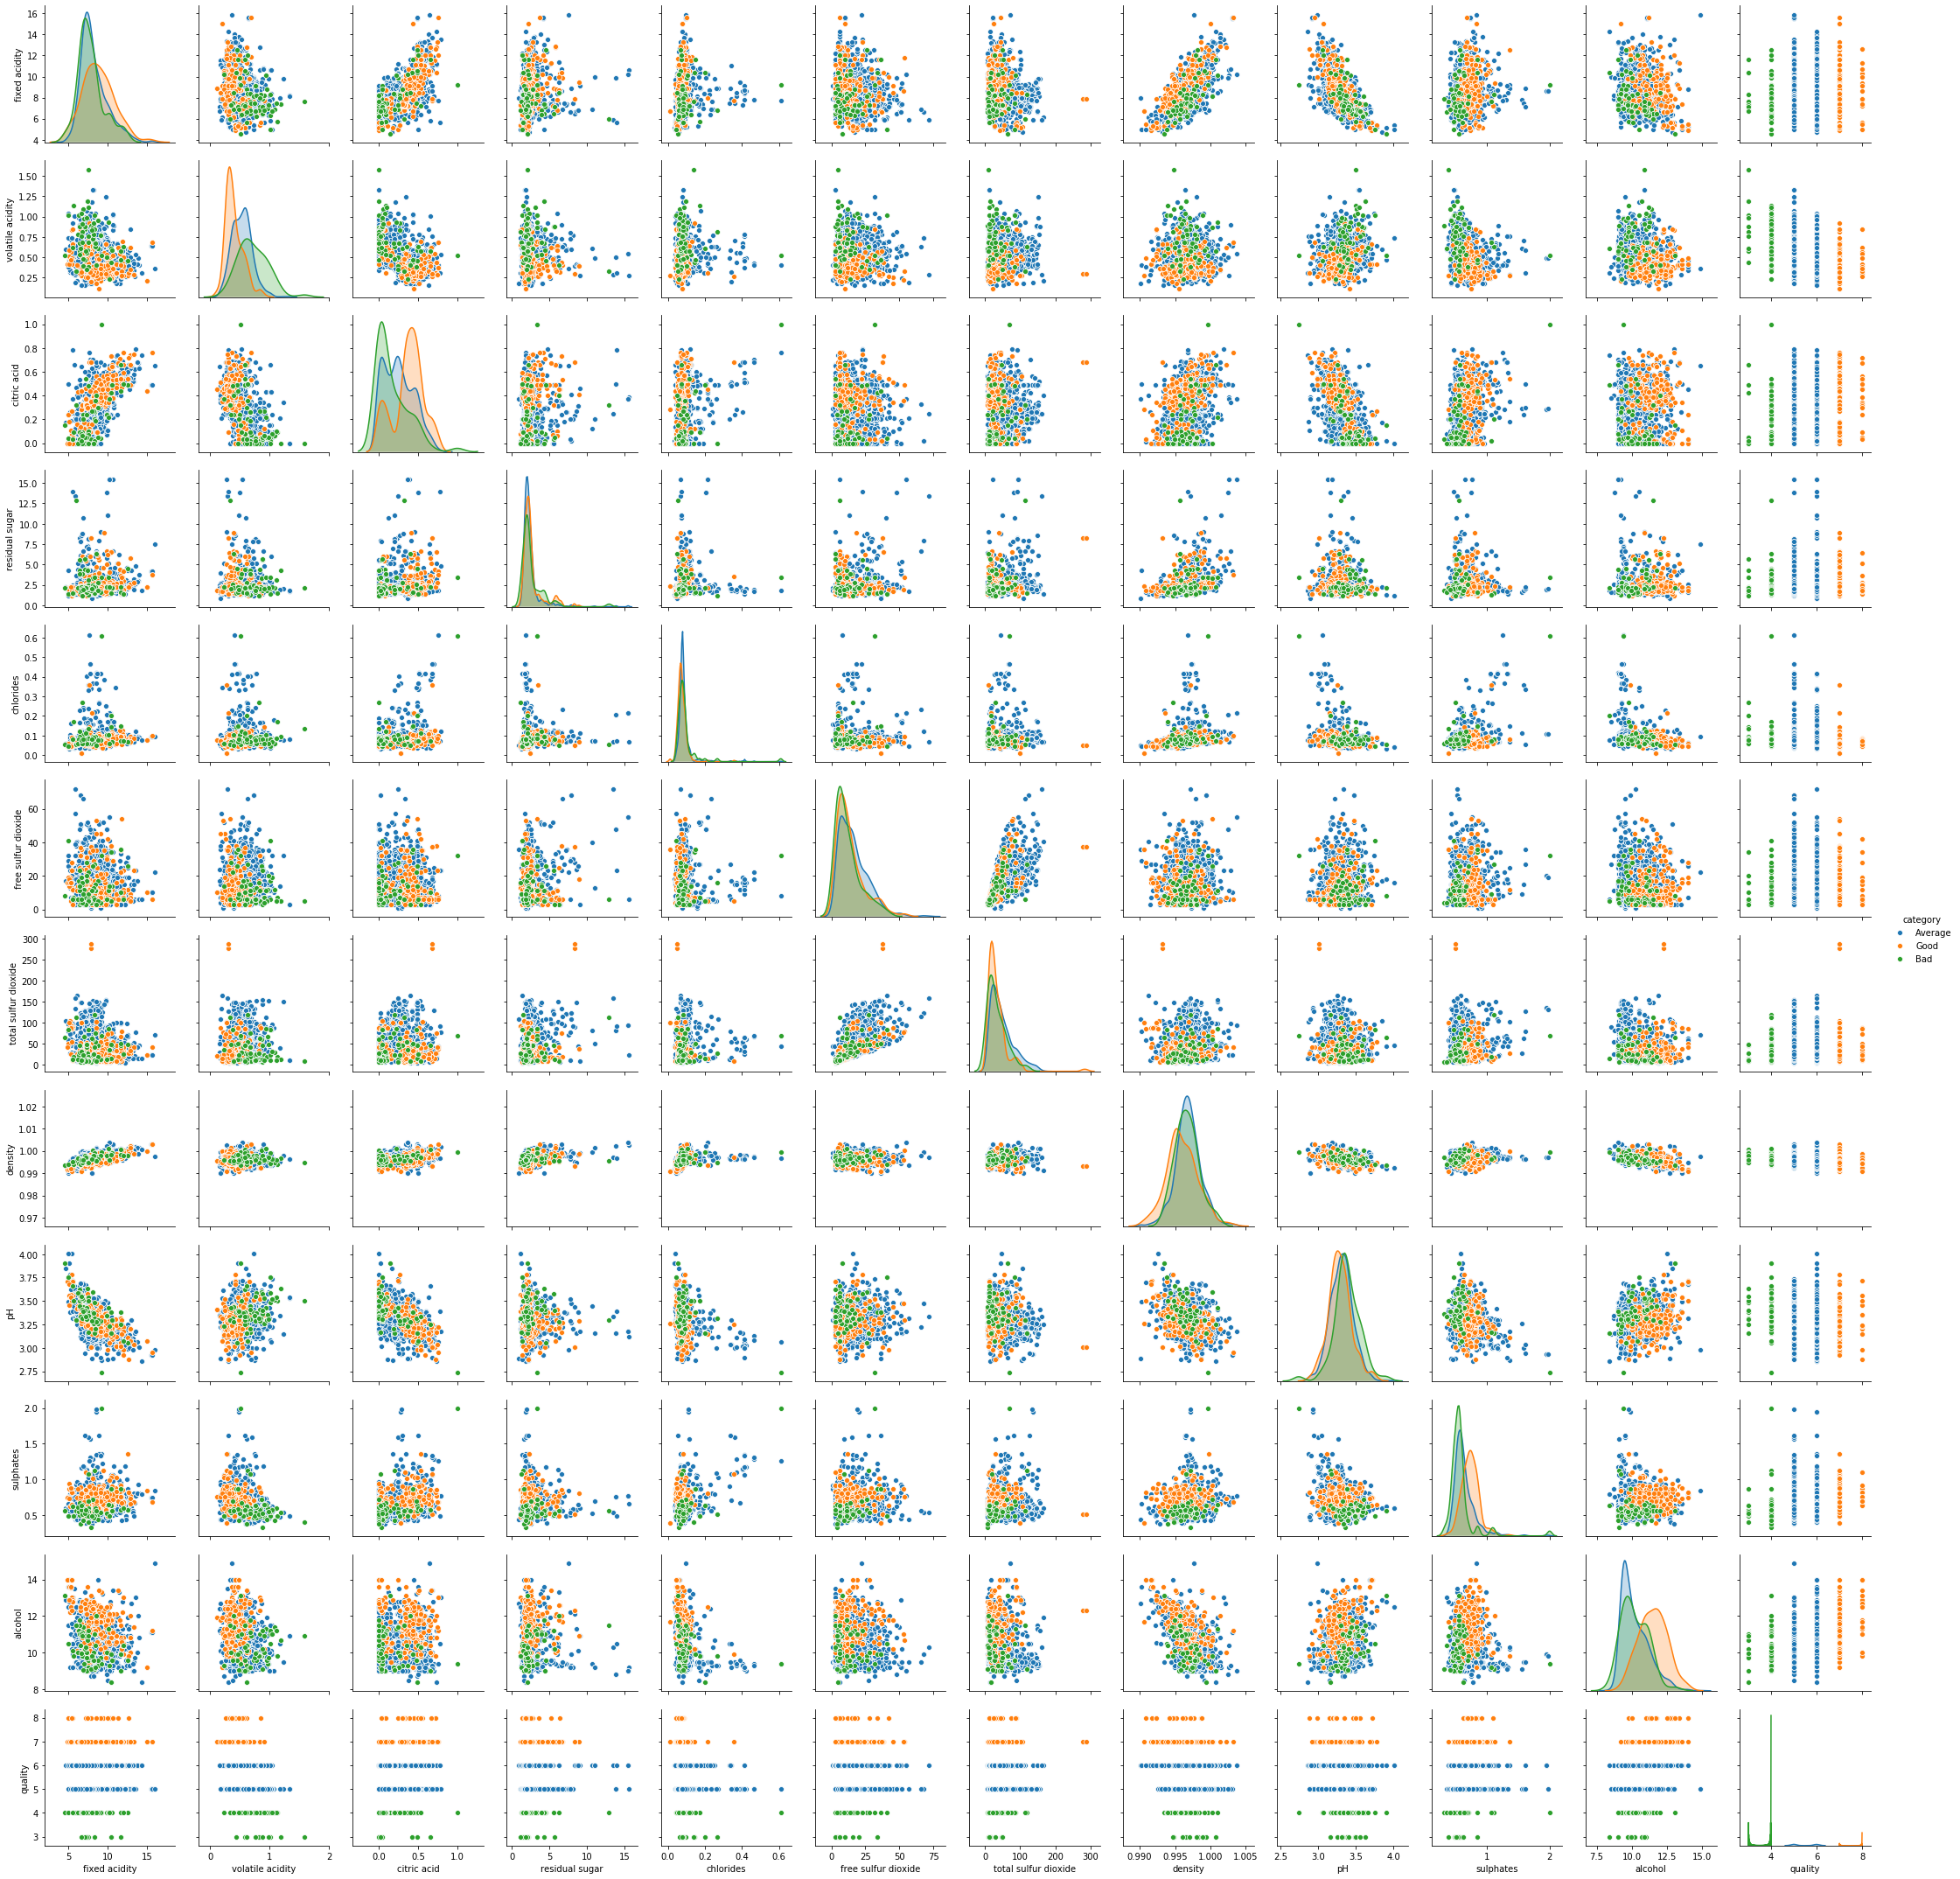

In [15]:
sns.pairplot(df,hue="category")
plt.show()

In [16]:
from plotnine import *

In [17]:
df[['category','pH']].groupby(['category']).mean()

,pH
category,
Average,3.311296
Bad,3.384127
Good,3.288802


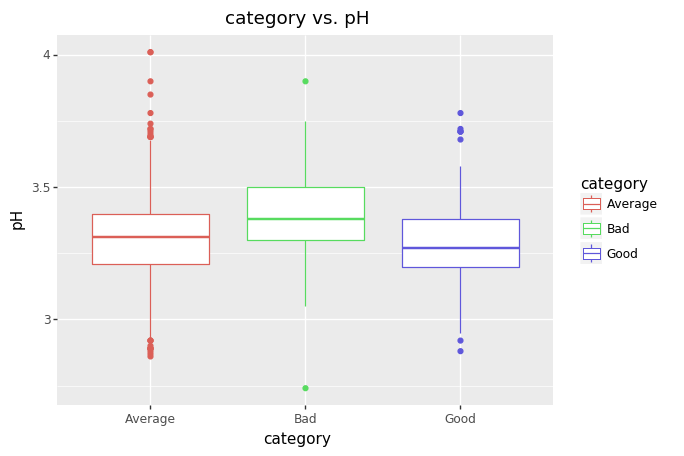

<ggplot: (-9223371926931356692)>

In [18]:
(ggplot(df)
 + aes(x='category', y='pH', color='category')
 + geom_boxplot()
 + labs(title='category vs. pH', x='category', y='pH')
)

### pH remains almost close to ~ 3.3-3.4 for all categories so its not affecting the quality

# acidity

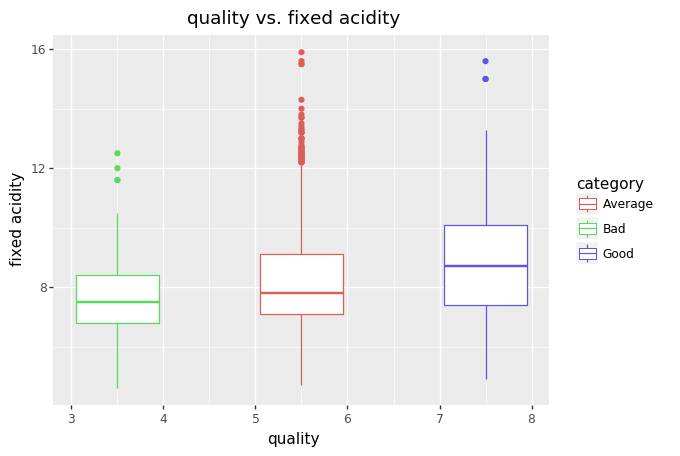

<ggplot: (-9223371926931355864)>

In [19]:
(ggplot(df)
 + aes(x='quality', y='fixed acidity',color='category')+geom_boxplot()
 + labs(title='quality vs. fixed acidity', x='quality', y='fixed acidity')
)

As you can see, the median value for the fixed acidity is close to 8 and is uniform through all the quality range of wines. I dont think we have an effect of fixed acidity impact on the wines with the quality. Now moving on to volatile acidity for a similar plot

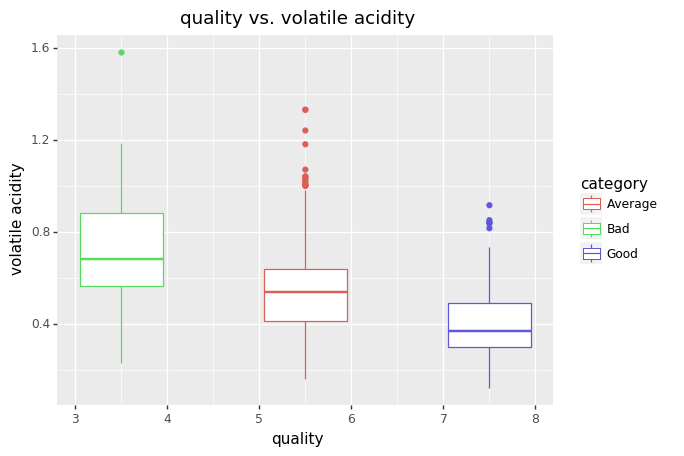

<ggplot: (-9223371926931204160)>

In [20]:
(ggplot(df)
 + aes(x='quality', y='volatile acidity',color='category')+geom_boxplot()
 + labs(title='quality vs. volatile acidity', x='quality', y='volatile acidity')
)

Ok now we see some deviation, the volatile acidity is proving to have some negative impact on the quality of the wine. As higher the volatile acidity gets, the quality of the wine decreases.Now with citric acid

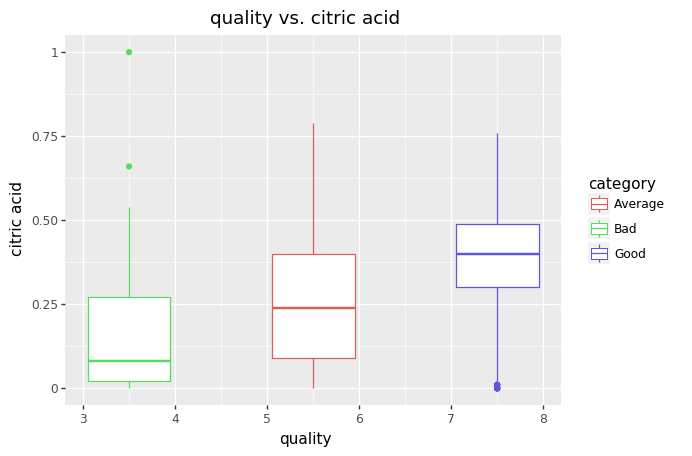

<ggplot: (-9223371926931296272)>

In [21]:
(ggplot(df)
 + aes(x='quality', y='citric acid',color='category')+geom_boxplot()
 + labs(title='quality vs. citric acid', x='quality', y='citric acid')
)

### from the above box plot we can infer that for good quality red wine have high amounts of citric acid 

### The pH for all the categories remains close to ~3.3 so it doesnt affect the model

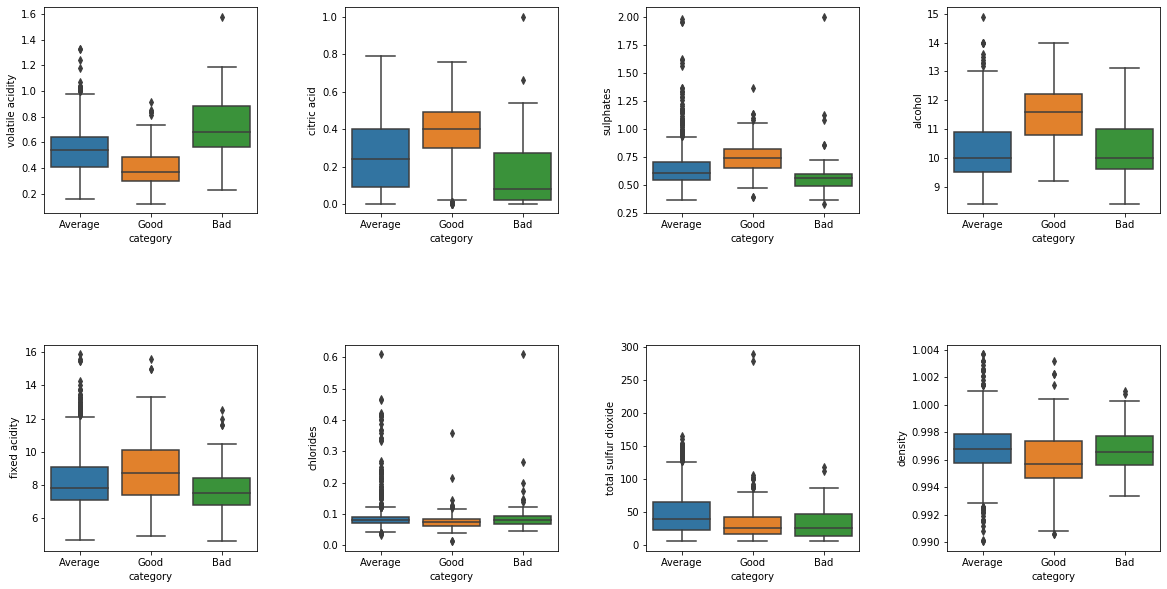

In [22]:
# volatile acidity, citric acid, sulphates, alcohol
# fixed acidity, chlorides, total sulfur dioxide, density
# Use Boxplot
fig, axs = plt.subplots(2, 4, figsize = (20,10)) 
ax1 = plt.subplot2grid((5,15), (0,0), rowspan=2, colspan=3) 
ax2 = plt.subplot2grid((5,15), (0,4), rowspan=2, colspan=3)
ax3 = plt.subplot2grid((5,15), (0,8), rowspan=2, colspan=3)
ax4 = plt.subplot2grid((5,15), (0,12), rowspan=2, colspan=3)

ax5 = plt.subplot2grid((5,15), (3,0), rowspan=2, colspan=3) 
ax6 = plt.subplot2grid((5,15), (3,4), rowspan=2, colspan=3)
ax7 = plt.subplot2grid((5,15), (3,8), rowspan=2, colspan=3)
ax8 = plt.subplot2grid((5,15), (3,12), rowspan=3, colspan=3)

sns.boxplot(x='category',y='volatile acidity', data = df, ax=ax1)
sns.boxplot(x='category',y='citric acid', data = df, ax=ax2)
sns.boxplot(x='category',y='sulphates', data = df, ax=ax3)
sns.boxplot(x='category',y='alcohol', data = df, ax=ax4)

sns.boxplot(x='category',y='fixed acidity', data = df, ax=ax5)
sns.boxplot(x='category',y='chlorides', data = df, ax=ax6)
sns.boxplot(x='category',y='total sulfur dioxide', data = df, ax=ax7)
sns.boxplot(x='category',y='density', data = df, ax=ax8)

# Finding the outlier 

In [23]:
mod=[]
def find_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_high=df_in.loc[(df_in[col_name] > fence_high)]
    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    outlier_percentage=(df_high.shape[0]/len(df))*100
    outlier_percentage=round(outlier_percentage,2)
    print(outlier_percentage)
    mod.append((col_name,outlier_percentage))

In [24]:
find_outlier(df,'fixed acidity')
find_outlier(df,'volatile acidity')
find_outlier(df,'citric acid')
find_outlier(df,'residual sugar')
find_outlier(df,'free sulfur dioxide')
find_outlier(df,'total sulfur dioxide')
find_outlier(df,'density')
find_outlier(df,'pH')
find_outlier(df,'sulphates')
find_outlier(df,'alcohol')

3.06
1.19
0.06
9.69
1.88
3.44
1.5
1.31
3.69
0.81


In [25]:
length=df.shape[1]
length=length-2

In [26]:
result=[]
names=[]
for i in range(0,length-1):
    result.append(mod[i][1])
    names.append(mod[i][0])

In [27]:
a=pd.DataFrame(result)
a.rename(columns={0:"outlier_percentage"},inplace=True)

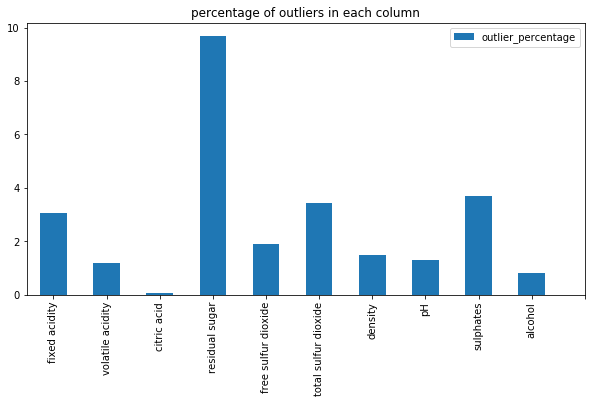

In [28]:
a.plot.bar(figsize=(10, 5))
plt.xticks(np.arange(length),names)
plt.title("percentage of outliers in each column")
plt.show()

residual sugar has ouliers more than 5% hence imputation is needed

In [29]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df['residual sugar']=remove_outlier(df,'residual sugar')


In [30]:
df['residual sugar'].fillna(method='ffill',inplace=True)

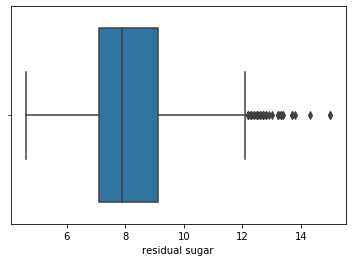

In [31]:
sns.boxplot(df['residual sugar'])

In [32]:
mod=[]
def find_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_high=df_in.loc[(df_in[col_name] > fence_high)]
    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    outlier_percentage=(df_high.shape[0]/len(df))*100
    outlier_percentage=round(outlier_percentage,2)
    print(outlier_percentage)
    mod.append((col_name,outlier_percentage))

In [33]:
find_outlier(df,'fixed acidity')
find_outlier(df,'volatile acidity')
find_outlier(df,'citric acid')
find_outlier(df,'residual sugar')
find_outlier(df,'free sulfur dioxide')
find_outlier(df,'total sulfur dioxide')
find_outlier(df,'density')
find_outlier(df,'pH')
find_outlier(df,'sulphates')
find_outlier(df,'alcohol')

3.06
1.19
0.06
2.94
1.88
3.44
1.5
1.31
3.69
0.81


In [34]:
result=[]
names=[]
for i in range(0,length-1):
    result.append(mod[i][1])
    names.append(mod[i][0])

In [35]:
a=pd.DataFrame(result)
a.rename(columns={0:"outlier_percentage"},inplace=True)

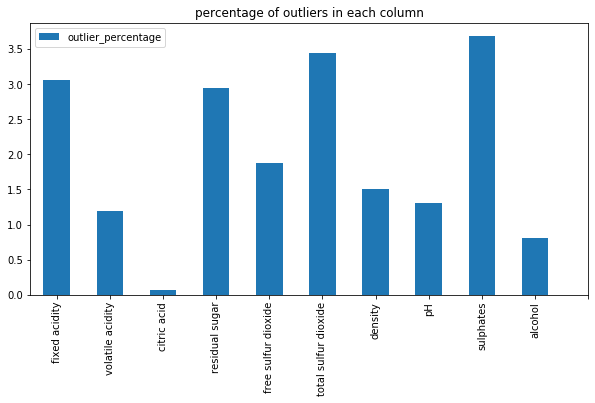

In [36]:
a.plot.bar(figsize=(10, 5))
plt.xticks(np.arange(length),names)
plt.title("percentage of outliers in each column")
plt.show()

In [37]:
df.drop(columns="quality",axis=1,inplace=True)

# label encoding 

In [38]:
le=preprocessing.LabelEncoder()    # label encoding

df['category']=le.fit_transform(df['category']) #dataframe method

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,7.4,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,7.8,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,7.8,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,11.2,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,7.4,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [39]:
df.category.value_counts()

0    1319
2     217
1      63
Name: category, dtype: int64

### 0-Average
### 2-Good
### 1-Bad

In [40]:
y=df.category
X=df.drop("category",axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Before scaling accuracy using various models

In [42]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    GaussianNB()
]

In [43]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("accuracy test pred:",accuracy_score(y_test,y_pred),"\n")
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8364611260053619 

accuracy test: 0.8208333333333333 

accuracy test pred: 0.8208333333333333 

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.814583333

# after scaling accuracy using various models

In [44]:
y=df.category
X=df.drop("category",axis=1)

In [45]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    GaussianNB()
]

In [48]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("accuracy test:",accuracy_score(y_test,y_pred),"\n")
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8489722966934763 

accuracy test: 0.825 

accuracy test: 0.825 

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.81875 

accuracy test: 0.81875 

-------

## after scaling accuracy slightly got improved 

# Ensemble Techniques
# BaggingClassifier()

In [49]:

kfold = model_selection.KFold(n_splits=10, random_state=21)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8242767295597485


In [50]:
 # fit a ensemble.BaggingClassifier() model to the data
model = BaggingClassifier()
model.fit(X_train, y_train)
print(); print(model)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [51]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

In [52]:
from sklearn import metrics
print(); print('ensemble.BaggingClassifier(): ')
print();print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))
print(); print(metrics.classification_report(expected_y, predicted_y))


ensemble.BaggingClassifier(): 

Accuracy: 0.825

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       395
           1       0.00      0.00      0.00        18
           2       0.57      0.46      0.51        67

    accuracy                           0.82       480
   macro avg       0.48      0.46      0.47       480
weighted avg       0.80      0.82      0.81       480



# ExtraTreesClassifier

In [53]:
# fit a ensemble.ExtraTreesClassifier() model to the data
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(); print(model)
    
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


In [54]:
# summarize the fit of the model
print(); print('ensemble.ExtraTreesClassifier(): ')
print();print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))


ensemble.ExtraTreesClassifier(): 

Accuracy: 0.8520833333333333

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       395
           1       0.00      0.00      0.00        18
           2       0.65      0.48      0.55        67

    accuracy                           0.85       480
   macro avg       0.51      0.48      0.49       480
weighted avg       0.81      0.85      0.83       480


[[377   1  17]
 [ 18   0   0]
 [ 35   0  32]]


# Ensemble_Boosting
# Adaboost classifier

In [55]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [56]:
predictions = classifier.predict(X_test)

# model evaluation

In [57]:
confusion_matrix(y_test, predictions)

array([[255,  69,  71],
       [ 13,   4,   1],
       [ 25,   0,  42]])

In [58]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6270833333333333


# Gradient Descent

In [59]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.831993
Accuracy score (validation): 0.831250
Learning rate:  0.075
Accuracy score (training): 0.848972
Accuracy score (validation): 0.831250
Learning rate:  0.1
Accuracy score (training): 0.857909
Accuracy score (validation): 0.831250
Learning rate:  0.25
Accuracy score (training): 0.885612
Accuracy score (validation): 0.820833
Learning rate:  0.5
Accuracy score (training): 0.907060
Accuracy score (validation): 0.810417
Learning rate:  0.75
Accuracy score (training): 0.917784
Accuracy score (validation): 0.822917
Learning rate:  1
Accuracy score (training): 0.922252
Accuracy score (validation): 0.797917


# Select the learning rate from the above observation, we considered 0.05

In [60]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions,binary=True))

print();print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print();print("Classification Report")
print();print(classification_report(y_test, predictions))

Confusion Matrix:
[[454   8]
 [ 17   1]]

Accuracy: 0.8229166666666666

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       395
           1       0.11      0.06      0.07        18
           2       0.57      0.36      0.44        67

    accuracy                           0.82       480
   macro avg       0.52      0.45      0.47       480
weighted avg       0.79      0.82      0.80       480



# XG Boost classifier

In [61]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0,

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[374,  18,  45],
       [  3,   0,   0],
       [ 18,   0,  22]], dtype=int64)

In [64]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.825


# Stacking

In [65]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.05,
                  n_estimators=100, max_depth=3),
    
    ExtraTreesClassifier(),
    LogisticRegression()
    
]

In [66]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.80427046]
    fold  1:  [0.82500000]
    fold  2:  [0.83870968]
    fold  3:  [0.81720430]
    ----
    MEAN:     [0.82129611] + [0.01248566]
    FULL:     [0.82126899]

model  1:     [XGBClassifier]
    fold  0:  [0.83274021]
    fold  1:  [0.85714286]
    fold  2:  [0.84946237]
    fold  3:  [0.83154122]
    ----
    MEAN:     [0.84272166] + [0.01093206]
    FULL:     [0.84271671]

model  2:     [ExtraTreesClassifier]
    fold  0:  [0.85409253]
    fold  1:  [0.84642857]
    fold  2:  [0.84946237]
    fold  3:  [0.83870968]
    ----
    MEAN:     [0.84717329] + [0.00559694]
    FULL:     [0.84718499]

model  3:     [LogisticRegression]
    fold  0:  [0.81850534]
    fold  1:  [0.85000000]
    fold  2:  [0.86021505]
    fold  3:  [0.83870968]
    ----
    MEAN:     [0.84185752] + [0.01548009]
    FULL:    

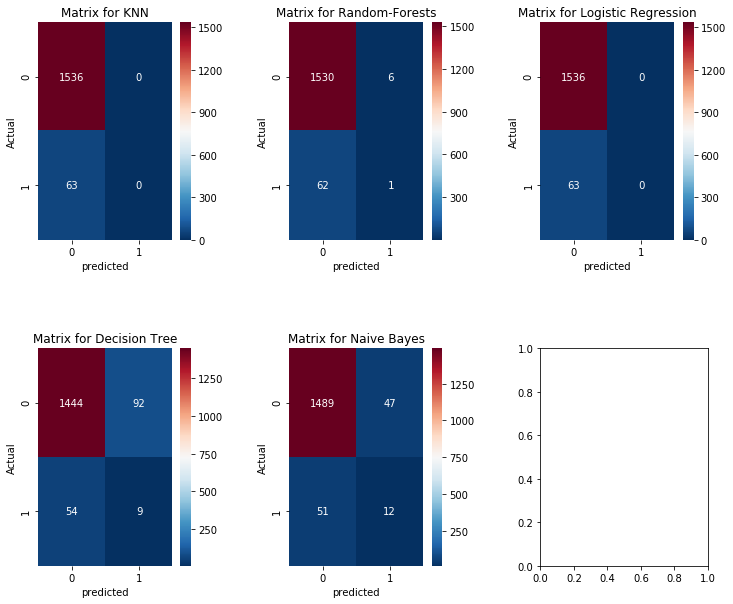

In [133]:
from mlxtend.evaluate import confusion_matrix
f,ax=plt.subplots(2,3,figsize=(12,10))

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[0,0],annot=True,fmt='d',cmap = 'RdBu_r')
ax[0,0].set_title('Matrix for KNN')
ax[0,0].set_xlabel("predicted")
ax[0,0].set_ylabel("Actual")
bottom, top = ax[0,0].get_ylim()
ax[0,0].set_ylim(bottom + 0.5, top - 0.5)

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[0,1],annot=True,fmt='2.0f',cmap = 'RdBu_r')
ax[0,1].set_title('Matrix for Random-Forests')
ax[0,1].set_xlabel("predicted")
ax[0,1].set_ylabel("Actual")
bottom, top = ax[0,1].get_ylim()
ax[0,1].set_ylim(bottom + 0.5, top - 0.5)

y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[0,2],annot=True,fmt='2.0f',cmap = 'RdBu_r')
ax[0,2].set_title('Matrix for Logistic Regression')
ax[0,2].set_xlabel("predicted")
ax[0,2].set_ylabel("Actual")
bottom, top = ax[0,2].get_ylim()
ax[0,2].set_ylim(bottom + 0.5, top - 0.5)

y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[1,0],annot=True,fmt='2.0f',cmap = 'RdBu_r')
ax[1,0].set_title('Matrix for Decision Tree')
ax[1,0].set_xlabel("predicted")
ax[1,0].set_ylabel("Actual")
bottom, top = ax[1,0].get_ylim()
ax[1,0].set_ylim(bottom + 0.5, top - 0.5)

y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[1,1],annot=True,fmt='2.0f',cmap = 'RdBu_r')
ax[1,1].set_title('Matrix for Naive Bayes')
ax[1,1].set_xlabel("predicted")
ax[1,1].set_ylabel("Actual")
bottom, top = ax[1,1].get_ylim()
ax[1,1].set_ylim(bottom + 0.5, top - 0.5)

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

## from confusion matrix we can see kNN and logistic regression giving better predictions than others

# Un Supervised Learning

### Removing the target column and finding the category using unsupervised learning 

## K-means Clustering

In [68]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,7.4,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,7.8,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,7.8,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,11.2,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,7.4,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [69]:
X=df.drop('category',axis=1)

In [70]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
y_actual=le.fit_transform(df.category)

In [71]:
cluster_range=range(1,20)
cluster_errors=[]

In [72]:
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=0)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [73]:
cluster_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
cluster_df[0:10]

,num_clusters,cluster_errors
0,1,17589.000000
1,2,13638.015488
2,3,11966.136718
3,4,10626.884295
4,5,9442.513892
5,6,8629.481844
6,7,8241.014338
7,8,7912.663731
8,9,7581.060247
9,10,7306.527349


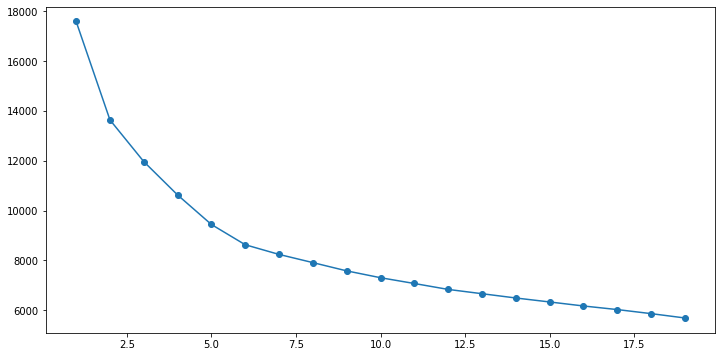

In [74]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_errors,marker="o")

In [75]:
kmeans=KMeans(n_clusters=4,random_state=1).fit(X_scaled)
centroids=kmeans.cluster_centers_
print(centroids)

[[ 9.54162998e-02  2.19980305e-03  1.18155266e+00  1.36153569e-01
   5.78475973e+00 -4.95156003e-02  5.10329601e-01  1.80071833e-01
  -1.73579154e+00  3.66341219e+00 -8.69731260e-01]
 [-6.68672896e-01  4.55348211e-01 -7.61128874e-01 -6.37656211e-01
  -1.70607224e-01 -2.77864022e-01 -3.83557389e-01 -4.54732169e-01
   6.27497748e-01 -2.91128421e-01  8.00601088e-02]
 [ 1.13579326e+00 -6.88969386e-01  1.01135226e+00  1.03954220e+00
  -4.52621078e-02 -4.99446413e-01 -5.19355464e-01  5.30526013e-01
  -7.41764126e-01  3.39766014e-01  3.14699551e-01]
 [-1.46939154e-01 -6.58143463e-04  7.91443959e-02 -9.36691320e-02
  -5.26320709e-02  1.05015431e+00  1.21632944e+00  1.67301461e-01
  -1.17535548e-01 -1.37115929e-01 -4.36057870e-01]]


In [76]:
y_pred=kmeans_y=kmeans.labels_

In [77]:
y_pred

array([1, 3, 1, ..., 1, 1, 1])

In [78]:
a=pd.DataFrame(y_pred)
a.rename(columns={0:"pred"},inplace=True)
a.pred.value_counts()

1    701
2    463
3    407
0     28
Name: pred, dtype: int64

In [79]:
confusion_matrix(y_actual,y_pred)

array([[ 26, 590, 325, 378],
       [  1,  44,  10,   8],
       [  1,  67, 128,  21],
       [  0,   0,   0,   0]])

In [80]:
accuracy_score(y_actual,y_pred)

0.12382739212007504

# inference: accuracy score is 12.38 % for k-means clustering 

# hierarchy

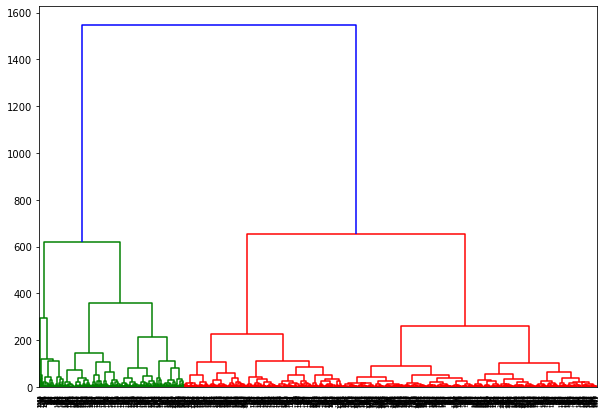

In [81]:
linked=linkage(X,'ward')

labeellist=X.index


plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labeellist,distance_sort='descending',show_leaf_counts=True)
plt.show()

In [82]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_pred=cluster.fit_predict(X)

In [83]:
y_pred=pd.DataFrame(y_pred)

In [84]:
y_pred.rename(columns={0:"pred"},inplace=True)

In [85]:
y_pred

,pred
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,0
1597,0


In [86]:
y_pred.pred.value_counts()

0    1183
1     416
Name: pred, dtype: int64

In [87]:
accuracy_score(y_actual,y_pred)

0.592245153220763

# accuracy score for hierarchy clustering is ~59%

# concating ypred to the existing dataframe

In [88]:
df1=df.copy()

In [89]:
df1.drop("category",axis=1,inplace=True)

In [90]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,7.4,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,7.8,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,7.8,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,11.2,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,7.4,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [91]:
df1["y_pred"]=y_pred

In [92]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_pred
0,7.4,0.700,0.00,7.4,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,7.8,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,7.8,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,11.2,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,7.4,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,6.2,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,5.9,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,6.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,5.9,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [93]:
df1.y_pred.value_counts()

0    1183
1     416
Name: y_pred, dtype: int64

In [94]:
y=df1.y_pred
X=df1.drop("y_pred",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Before scaling 

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    GaussianNB()
]

results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("accuracy test pred:",accuracy_score(y_test,y_pred),"\n")
    print("--------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.9740840035746202 

accuracy test: 0.9604166666666667 

accuracy test pred: 0.9604166666666667 

--------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.99166666

# smote

### To balance the unbalanced data

In [95]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [96]:
y=df.category
X=df.drop("category",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [97]:
y.value_counts()

0    1319
2     217
1      63
Name: category, dtype: int64

In [98]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X, y)

In [99]:
np.bincount(y_train)

array([1319, 1319, 1319], dtype=int64)

In [100]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    GaussianNB()
]

results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("accuracy test pred:",accuracy_score(y_test,y_pred),"\n")
    print("--------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.7318675764468031 

accuracy test: 0.5145833333333333 

accuracy test pred: 0.5145833333333333 

--------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

accuracy train: 1.0 

accuracy test: 1.0 

accu

In [101]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(("RF",RandomForestClassifier(n_estimators=100)))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('NB', GaussianNB(pri

In [102]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.826769 (0.064828)
KNN: 0.818015 (0.071495)
CART: 0.747999 (0.073229)
NB: 0.778648 (0.070637)
RF: 0.841785 (0.052791)


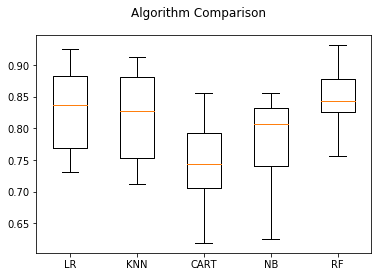

In [103]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# PCA

# Before scaling 

In [104]:
y=df.category
X=df.drop("category",axis=1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [106]:
#PCA for all the features
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

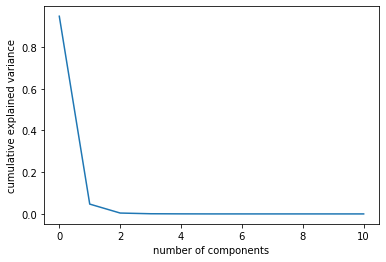

In [107]:
#explained varaince
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [108]:
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

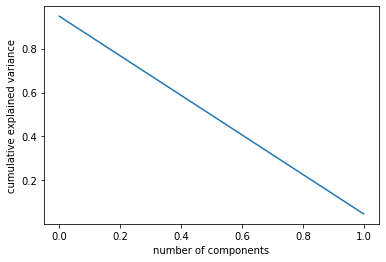

In [109]:
#explained varaince
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [110]:
classifiers = [
    KNeighborsClassifier()
]

In [111]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("accuracy test pred:",accuracy_score(y_test,y_pred),"\n")
    print("-------------------------------------------------------------------------------------------------------")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.8400357462019661 

accuracy test: 0.8291666666666667 

accuracy test pred: 0.8291666666666667 

-------------------------------------------------------------------------------------------------------


# after scaling

In [112]:
y=df.category
X=df.drop("category",axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [114]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [115]:
#PCA for all the features
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

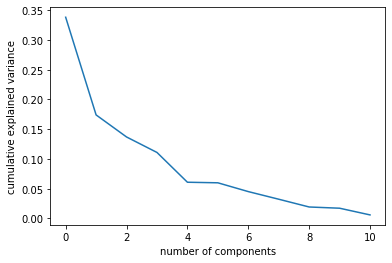

In [116]:
#explained varaince
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [117]:
pca=PCA(n_components=4)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

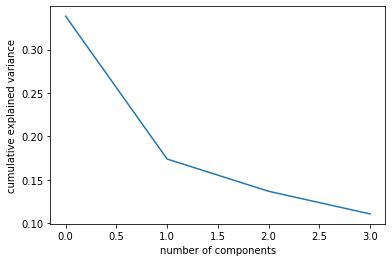

In [118]:
#explained varaince
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [119]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("accuracy test pred:",accuracy_score(y_test,y_pred),"\n")
    print("-------------------------------------------------------------------------------------------------------")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.8641644325290437 

accuracy test: 0.8354166666666667 

accuracy test pred: 0.8354166666666667 

-------------------------------------------------------------------------------------------------------
